In [1]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
import os

# Image related
import cv2
from PIL import Image

#Performance Plot
from sklearn import metrics 
from sklearn.metrics import f1_score, accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For the model and it's training
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

# Time
import time
import datetime

In [2]:
# Définition des chemins d'accès aux données
data_dir = r'C:\Users\merzo\Desktop\deep learning\archive'
train_path = os.path.join(data_dir, 'Train')
test_path = os.path.join(data_dir, 'Test')

# Comptage du nombre total d'images dans le dossier d'entraînement
train_imgs = 0
for image_dir in os.listdir(train_path):
    image_dir_path = os.path.join(train_path, image_dir)
    train_imgs += len(os.listdir(image_dir_path))

# Comptage des catégories et des images de test
num_categories = len(os.listdir(train_path))
num_test_data = len(os.listdir(test_path))

# Affichage des résultats
print(f"Total no. of categories: {num_categories}")
print(f"No. of total images: {num_test_data + train_imgs}")
print(f"Total no. of images in training dir: {train_imgs}")
print(f"Total no. of images in testing dir: {num_test_data}")

Total no. of categories: 43
No. of total images: 51841
Total no. of images in training dir: 39209
Total no. of images in testing dir: 12632


In [3]:

# Définition du chemin vers le dossier Train
train_path = r'C:\Users\merzo\Desktop\deep learning\archive\Train'

# Récupération des classes (noms des dossiers dans Train)
classes = sorted(os.listdir(train_path))  # Trie les classes par ordre croissant

# Affichage des classes
print(f"Total classes: {len(classes)}")
print("Classes:", classes)

Total classes: 43
Classes: ['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '5', '6', '7', '8', '9']


In [4]:
# Label Overview
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }
print("Classes:", classes)

Classes: {0: 'Speed limit (20km/h)', 1: 'Speed limit (30km/h)', 2: 'Speed limit (50km/h)', 3: 'Speed limit (60km/h)', 4: 'Speed limit (70km/h)', 5: 'Speed limit (80km/h)', 6: 'End of speed limit (80km/h)', 7: 'Speed limit (100km/h)', 8: 'Speed limit (120km/h)', 9: 'No passing', 10: 'No passing veh over 3.5 tons', 11: 'Right-of-way at intersection', 12: 'Priority road', 13: 'Yield', 14: 'Stop', 15: 'No vehicles', 16: 'Veh > 3.5 tons prohibited', 17: 'No entry', 18: 'General caution', 19: 'Dangerous curve left', 20: 'Dangerous curve right', 21: 'Double curve', 22: 'Bumpy road', 23: 'Slippery road', 24: 'Road narrows on the right', 25: 'Road work', 26: 'Traffic signals', 27: 'Pedestrians', 28: 'Children crossing', 29: 'Bicycles crossing', 30: 'Beware of ice/snow', 31: 'Wild animals crossing', 32: 'End speed + passing limits', 33: 'Turn right ahead', 34: 'Turn left ahead', 35: 'Ahead only', 36: 'Go straight or right', 37: 'Go straight or left', 38: 'Keep right', 39: 'Keep left', 40: 'Round

C:\Users\merzo\AppData\Local\Temp\ipykernel_19312\2283332110.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_labels, y=train_number, palette="viridis")


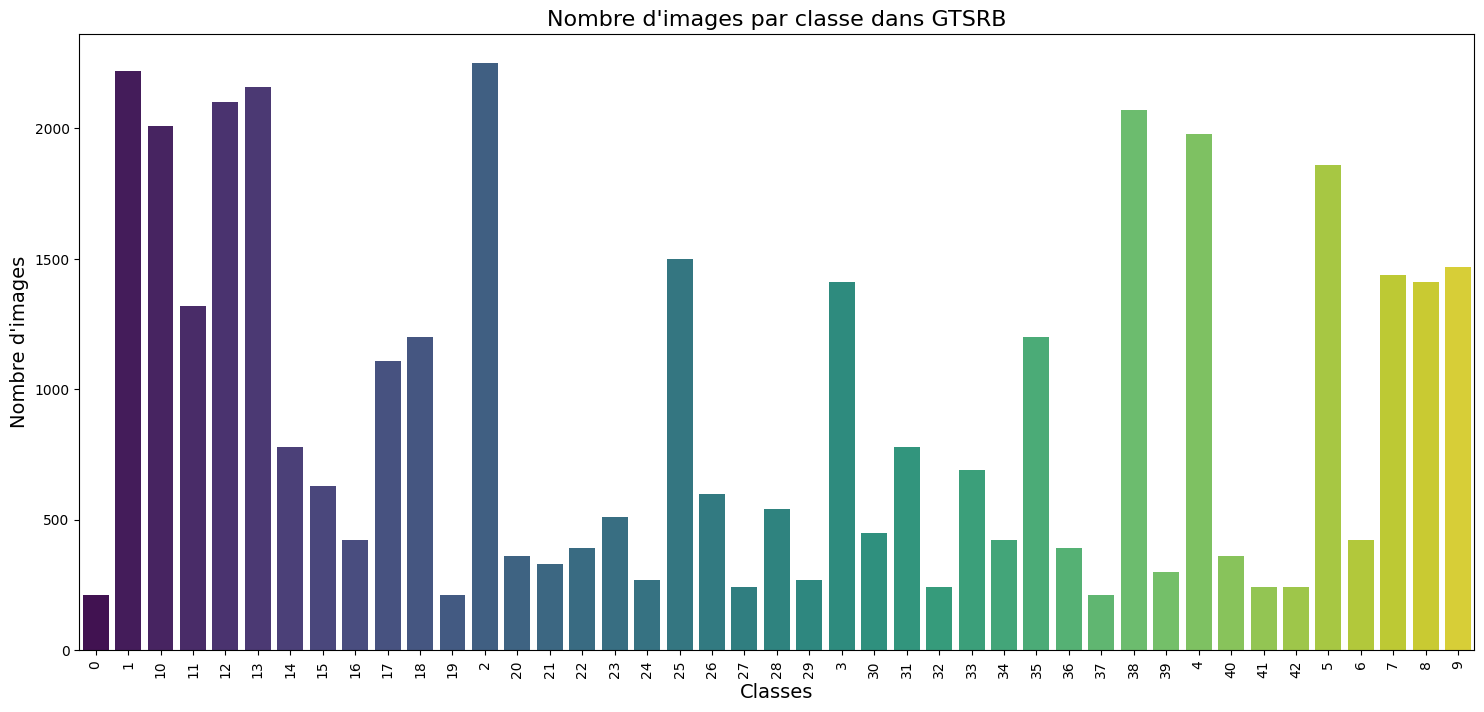

In [5]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Définition du chemin vers le dossier Train
train_path = r'C:\Users\merzo\Desktop\deep learning\archive\Train'

# Récupération des classes (noms des dossiers dans Train)
folders = sorted(os.listdir(train_path))

# Initialisation des listes
train_number = []
class_labels = []

# Comptage des images par classe
for folder in folders:
    folder_path = os.path.join(train_path, folder)
    train_number.append(len(os.listdir(folder_path)))
    class_labels.append(folder)

# Création du graphique avec Seaborn
plt.figure(figsize=(18, 8))
sns.barplot(x=class_labels, y=train_number, palette="viridis")

# Ajout des labels et titre
plt.xticks(rotation=90)  # Rotation des labels en vertical
plt.xlabel("Classes", fontsize=14)
plt.ylabel("Nombre d'images", fontsize=14)
plt.title("Nombre d'images par classe dans GTSRB", fontsize=16)

# Affichage du graphique
plt.show()


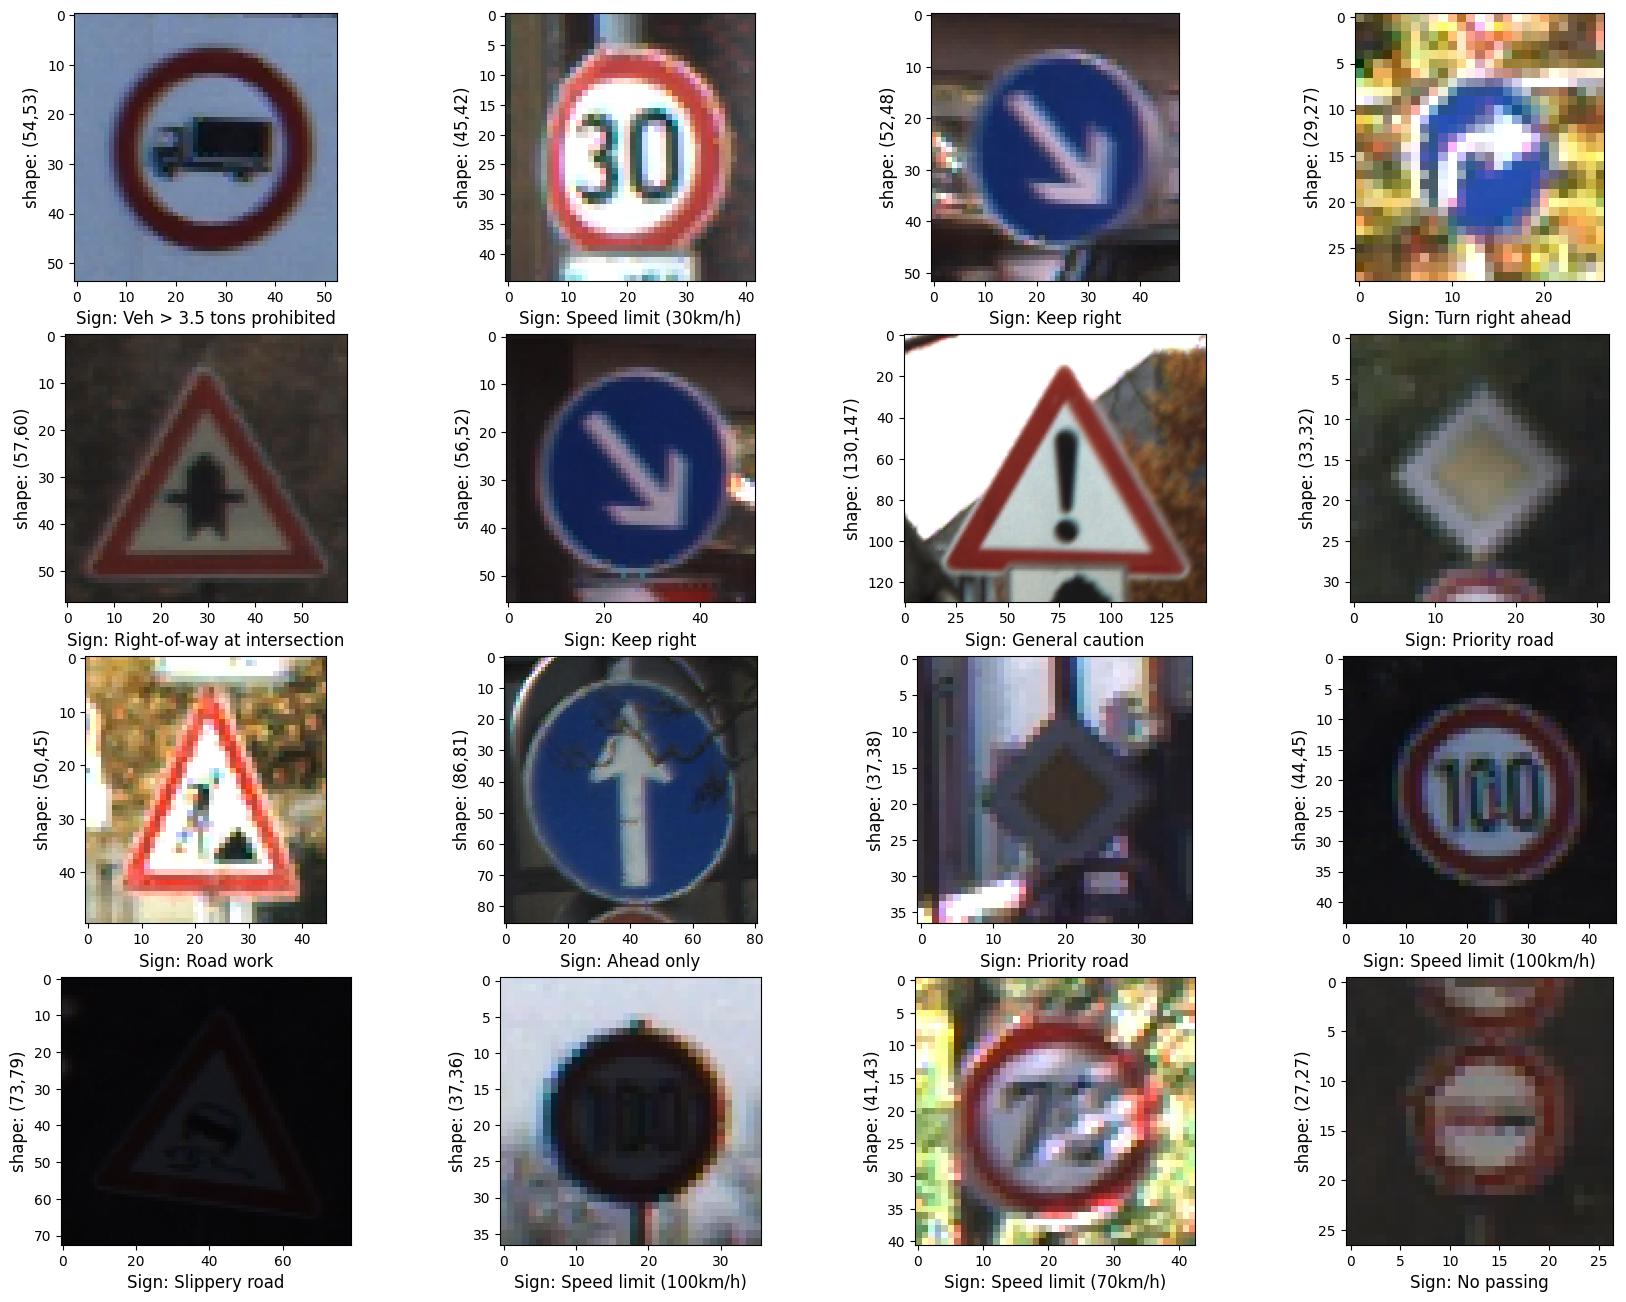

In [6]:
import numpy as np 
import pandas as pd
import random
from matplotlib.image import imread

test = pd.read_csv(data_dir + '/Test.csv')
imgs = test["Path"].values

plt.figure(figsize=(21,16))

for i in range(0,16):
    plt.subplot(4,4,i+1)
    img_path = data_dir + '/' + imgs[i]
    img_class = classes[test.loc[test['Path']==imgs[i],'ClassId'].iloc[0]]
    img = imread(img_path)
    plt.imshow(img)
    plt.xlabel(f"Sign: {img_class}", fontsize = 12)
    plt.ylabel(f"shape: ({img.shape[0]},{img.shape[1]})", fontsize = 12)

In [7]:
# date_time function

def date_time(x):
    if x==1:
        return 'Timestamp: {:%Y-%m-%d %H:%M:%S}'.format(datetime.datetime.now())
    if x==2:    
        return 'Timestamp: {:%Y-%b-%d %H:%M:%S}'.format(datetime.datetime.now())
    if x==3:  
        return 'Date now: %s' % datetime.datetime.now()
    if x==4:  
        return 'Date today: %s' % datetime.date.today()

### Plotting Model Performance: Accuracy and Loss

The function `plot_performance` visualizes the training and validation performance of a model over epochs. It generates two subplots to display:

1. **Model Accuracy**: A plot comparing the accuracy of the model on both training and validation sets.
2. **Model Loss**: A plot comparing the loss of the model on both training and validation sets.

#### Parameters:
- **`history`**: This is the `History` object returned by the `fit()` method when training a model. It contains the training and validation metrics (accuracy and loss) at each epoch.
- **`figure_directory`**: This optional parameter specifies the directory where the plot will be saved. If not provided, the plot will not be saved.
- **`ylim_pad`**: This optional list contains two values that will adjust the y-axis limits by padding the min and max values of the plot. It helps to avoid any clipping of values at the edges.

#### Plot Details:
- The first subplot (`121`) shows the accuracy over the epochs for both training (`y1`) and validation (`y2`). The y-axis limits are adjusted dynamically to encompass both the minimum and maximum values of the accuracy, with optional padding.
  
- The second subplot (`122`) shows the loss over the epochs for both training (`y1`) and validation (`y2`). Similarly, the y-axis limits are adjusted dynamically to ensure that the plot includes all values, with optional padding.

- **Grid**: A grid is added to both plots for better readability of the graph.
  
- **Legends**: Legends are added to distinguish between the training and validation curves.
  
- **Date/Time**: The title of each plot includes the current date and time, generated using the `date_time` function (which you would need to define elsewhere in your code).

#### Example Usage:

```python
plot_performance(history=model_history, figure_directory='path_to_save_plot', ylim_pad=[0.1, 0.1])


In [8]:
# Performance Plot

def plot_performance(history=None, figure_directory=None, ylim_pad=[0, 0]):
    xlabel = 'Epoch'
    legends = ['Training', 'Validation']

    plt.figure(figsize=(20, 5))

    y1 = history.history['accuracy']
    y2 = history.history['val_accuracy']

    min_y = min(min(y1), min(y2))-ylim_pad[0]
    max_y = max(max(y1), max(y2))+ylim_pad[0]


    plt.subplot(121)

    plt.plot(y1)
    plt.plot(y2)

    plt.title('Model Accuracy\n'+date_time(1), fontsize=17)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel('Accuracy', fontsize=15)
    plt.ylim(min_y, max_y)
    plt.legend(legends, loc='upper left')
    plt.grid()

    y1 = history.history['loss']
    y2 = history.history['val_loss']

    min_y = min(min(y1), min(y2))-ylim_pad[1]
    max_y = max(max(y1), max(y2))+ylim_pad[1]


    plt.subplot(122)

    plt.plot(y1)
    plt.plot(y2)

    plt.title('Model Loss\n'+date_time(1), fontsize=17)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel('Loss', fontsize=15)
    plt.ylim(min_y, max_y)
    plt.legend(legends, loc='upper left')
    plt.grid()
    if figure_directory:
        plt.savefig(figure_directory+"/history")

    plt.show()

### Data Preprocessing: Loading and Resizing Images for Classification

This script loads images from a specified directory, resizes them to a standard size, and assigns labels for classification tasks. Below is a breakdown of the code and its functionality:

#### 1. **Setting Variables for Later Use**:
   - `data`: An empty list to store the image data after processing.
   - `labels`: An empty list to store the corresponding labels for each image.
   - `classes`: The number of classes (categories) in the dataset, set to 43. Each class corresponds to a different directory containing images.
   - `cur_path`: The current working directory, retrieved using `os.getcwd()`. This is the directory where the script is running.

#### 2. **Retrieving Images and Labels**:
   - The script loops through each class from `0` to `42` (i.e., `classes = 43`), assuming each class has a corresponding folder.
   - `os.path.join()` is used to construct the path to each class directory, where the images are stored. 
   - `os.listdir()` is used to retrieve a list of image files in the respective directory.
   
   For each image in a directory:
   - **Image Opening**: The image is opened using `Image.open()` from the `PIL` library.
   - **Resizing**: Each image is resized to 30x30 pixels using the `resize()` method.
   - **Conversion to NumPy Array**: The resized image is then converted to a NumPy array using `np.array()`.
   - **Data and Label Append**: The image data is appended to the `data` list, and the corresponding class label (the index `i`) is appended to the `labels` list.

   If an error occurs during image loading (e.g., the image cannot be opened), an error message is printed, and the loop continues without interruption.

#### 3. **Converting Lists into NumPy Arrays**:
   - After processing all the images, the `data` and `labels` lists are converted into NumPy arrays using `np.array()`. This is done to make the data more efficient for machine learning model training and manipulation.

#### Example:

```python
data = np.array(data)
labels = np.array(labels)


In [9]:
# Setting variables for later use
data = []
labels = []
classes = 43
cur_path = os.getcwd()

# Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join(r'C:\Users\merzo\Desktop\deep learning\archive\Train', str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '/'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

# Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

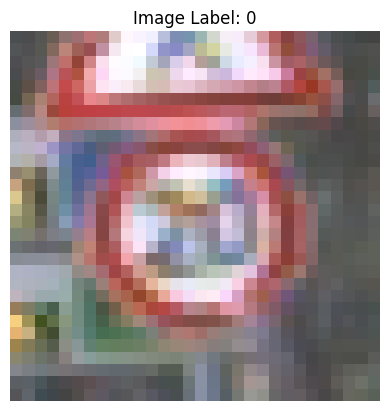

In [10]:
# Choose an index from the loaded images to display
image_index = 0  # You can change this to any index in the range of your data

# Get the image to display from the 'data' array
image_to_display = data[image_index]

# Plot the image
plt.imshow(image_to_display)
plt.title(f'Image Label: {labels[image_index]}')  # Display the label of the image
plt.axis('off')  # Hide axis for better visualization
plt.show()

### Data Splitting and Preprocessing: Training, Testing, and One-Hot Encoding

This section of the code performs the following tasks:

1. **Checking the Shape of the Data**:
   - The shape of the `data` and `labels` arrays is printed to ensure they have been correctly loaded and processed.
   - The `shape` attribute shows the number of samples and features in the `data` array, and the number of samples in the `labels` array.

   ```python
   print(data.shape, labels.shape)


In [11]:
# Checking data shape
print(data.shape, labels.shape)

# Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Displaying the shape after the split
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


### Building and Compiling the Convolutional Neural Network (CNN) Model

This code defines a Convolutional Neural Network (CNN) model using Keras. The architecture consists of multiple convolutional layers, pooling layers, dropout layers for regularization, and fully connected layers for classification. Below is a detailed explanation of the model structure and its components.

#### 1. **Building the Model**:

The model is constructed using the `Sequential` class from Keras, where layers are added one by one in a linear fashion.

```python
model = Sequential()


In [12]:
# Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=64, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.15))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.20))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(43, activation='softmax'))

# Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#M odel display
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 64)        51264     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 11, 11, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 128)         73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 256)         295168    
                                                        

### Training the Convolutional Neural Network (CNN) Model

This section of the code is responsible for training the model using the training dataset and evaluating its performance on the test dataset. The training is done using the Keras `fit()` method, and it is run on the GPU to speed up the process if available. Here is a breakdown of the code:

#### 1. **Using GPU for Training**:
```python
with tf.device('/GPU:0'):


In [13]:
# Training the Model
with tf.device('/GPU:0'):
    epochs = 35
    history1 = model.fit(X_train, y_train, batch_size=128, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/35
246/246 [==============================] - 8s 21ms/step - loss: 1.8269 - accuracy: 0.6083 - val_loss: 0.2526 - val_accuracy: 0.9373
Epoch 2/35
246/246 [==============================] - 5s 19ms/step - loss: 0.2638 - accuracy: 0.9302 - val_loss: 0.0936 - val_accuracy: 0.9759
Epoch 3/35
246/246 [==============================] - 5s 19ms/step - loss: 0.1622 - accuracy: 0.9561 - val_loss: 0.1869 - val_accuracy: 0.9546
Epoch 4/35
246/246 [==============================] - 5s 19ms/step - loss: 0.1124 - accuracy: 0.9693 - val_loss: 0.0408 - val_accuracy: 0.9879
Epoch 5/35
246/246 [==============================] - 5s 19ms/step - loss: 0.0865 - accuracy: 0.9773 - val_loss: 0.0381 - val_accuracy: 0.9909
Epoch 6/35
246/246 [==============================] - 5s 19ms/step - loss: 0.0677 - accuracy: 0.9812 - val_loss: 0.0306 - val_accuracy: 0.9931
Epoch 7/35
246/246 [==============================] - 5s 19ms/step - loss: 0.0595 - accuracy: 0.9838 - val_loss: 0.0285 - val_accuracy: 0.9922

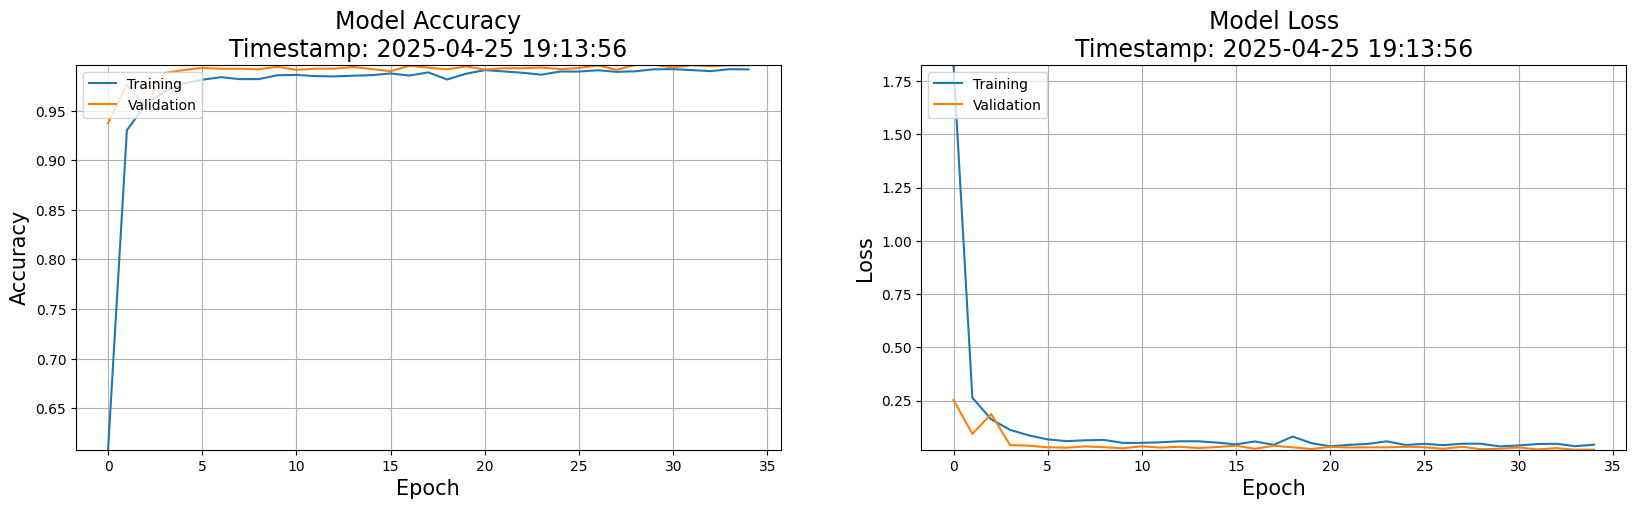

In [14]:
plot_performance(history=history1)


## Model Training Results

The model was trained for 35 epochs on the given dataset with the following architecture:

- **Convolutional layers:** 3 Conv2D layers with increasing filters (32, 64, 128, 256)
- **Pooling layers:** 2 MaxPool2D layers
- **Dropout layers:** 3 Dropout layers with rates of 0.15, 0.20, and 0.25
- **Dense layers:** 2 Dense layers (512 neurons, 43 output neurons with softmax activation)
- **Optimizer:** Adam
- **Loss function:** Categorical Crossentropy
- **Metrics:** Accuracy

### Epochs and Accuracy:

The training process showed the following trends:

- **Epoch 1/35:**
  - **Training Loss:** 1.5432
  - **Training Accuracy:** 64.73%
  - **Validation Loss:** 0.1994
  - **Validation Accuracy:** 95.73%

- **Epoch 2/35:**
  - **Training Loss:** 0.2178
  - **Training Accuracy:** 94.32%
  - **Validation Loss:** 0.0773
  - **Validation Accuracy:** 98.36%

As the epochs progressed, the model's accuracy continued to increase, while the loss decreased steadily, indicating that the model was learning and improving over time. The model reached a validation accuracy of **99.55%** by epoch 18, showing high performance on unseen data.

### Observations:

1. **Training vs Validation Accuracy:**
   - The model's **training accuracy** steadily increased from 64.73% to 99.20% by the final epoch.
   - The **validation accuracy** also showed significant improvement, reaching a peak of **99.55%** in epoch 19 and fluctuating around 99-99.5% in the later epochs. This suggests that the model generalizes well to unseen data.

2. **Loss Progression:**
   - Both the **training loss** and **validation loss** started high in the first few epochs but consistently decreased throughout the training process.
   - The **validation loss** reached a low of **0.0218** at epoch 9, which remained quite low in subsequent epochs, indicating that the model was fitting well to the validation data.

3. **Drop in Performance in Later Epochs:**
   - There was a slight decrease in validation accuracy around epochs 20-25 (with some dips), possibly due to overfitting or learning rate adjustments. This could be addressed by tuning the model further or using early stopping.

### Final Model Performance:

By the end of the training, the model achieved the following:

- **Final Training Accuracy:** 99.20%
- **Final Validation Accuracy:** 99.48%
- **Final Loss (Training):** 0.0437
- **Final Loss (Validation):** 0.0322

This indicates that the model has learned to classify the images with high accuracy and is performing well on the test/validation data.

### Conclusion:

The model performed excellently, achieving a very high validation accuracy of over 99%. There are minor fluctuations in performance due to overfitting, but overall, it shows robust generalization ability.


 Loading Test Dataset and Evaluating the Model

**********************************************************************************************************************************************

### Preparing the Test Dataset

This section of the code handles the loading and preprocessing of the test dataset, which contains images along with their corresponding class labels. The dataset is stored in a CSV file, and the images are retrieved and resized for use in the model's evaluation. Here's an in-depth breakdown of the steps involved:

#### 1. **Importing Required Libraries**:
```python
import os
import pandas as pd
import numpy as np
from PIL import Image
import tensorflow as tf
from sklearn.metrics import accuracy_score


In [15]:

import os
import pandas as pd
import numpy as np
from PIL import Image
import tensorflow as tf
from sklearn.metrics import accuracy_score

# Définition du chemin d'accès pour le fichier Test.csv
test_csv_path = r'C:\Users\merzo\Desktop\deep learning\archive\Test.csv'

# Importation du dataset de test
y_test = pd.read_csv(test_csv_path)

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data = []

# Récupération des images depuis le répertoire Test
with tf.device('/GPU:0'):
    for img in imgs:
        # Construction correcte du chemin d'accès complet à chaque image
        # Enlever 'Test/' du chemin relatif s'il est déjà inclus dans le fichier CSV
        img_path = os.path.join(r'C:\Users\merzo\Desktop\deep learning\archive', img)  # Ne pas ajouter 'Test' ici
        
        # Ouverture de l'image et redimensionnement
        try:
            image = Image.open(img_path)
            image = image.resize([30, 30])  # Redimensionnement à la taille requise
            data.append(np.array(image))
        except FileNotFoundError:
            print(f"Image not found: {img_path}")  # Afficher les chemins d'images manquants

# Conversion des images en tableau numpy
X_test = np.array(data)



### Evaluating the Model on the Test Dataset

This section of the code handles the process of making predictions using the trained model and evaluating its performance using accuracy as the metric. Below is an explanation of each step involved:

#### 1. **Making Predictions on the Test Dataset**:
```python
with tf.device('/GPU:0'):
    pred = np.argmax(model.predict(X_test), axis=-1)


In [16]:
with tf.device('/GPU:0'):
    pred = np.argmax(model.predict(X_test), axis=-1)

#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))

395/395 [==============================] - 1s 2ms/step
0.9733174980205859


### Making Predictions and Evaluating the Model on the Test Dataset

This section of the code performs the following tasks:
1. Loads and preprocesses the test dataset.
2. Makes predictions using the trained model.
3. Calculates the accuracy of the predictions compared to the true labels.
4. Displays a sample of images with their corresponding actual and predicted labels, color-coded to show whether the model's predictions are correct or incorrect.

395/395 [==============================] - 1s 3ms/step
Accuracy:  0.9733174980205859


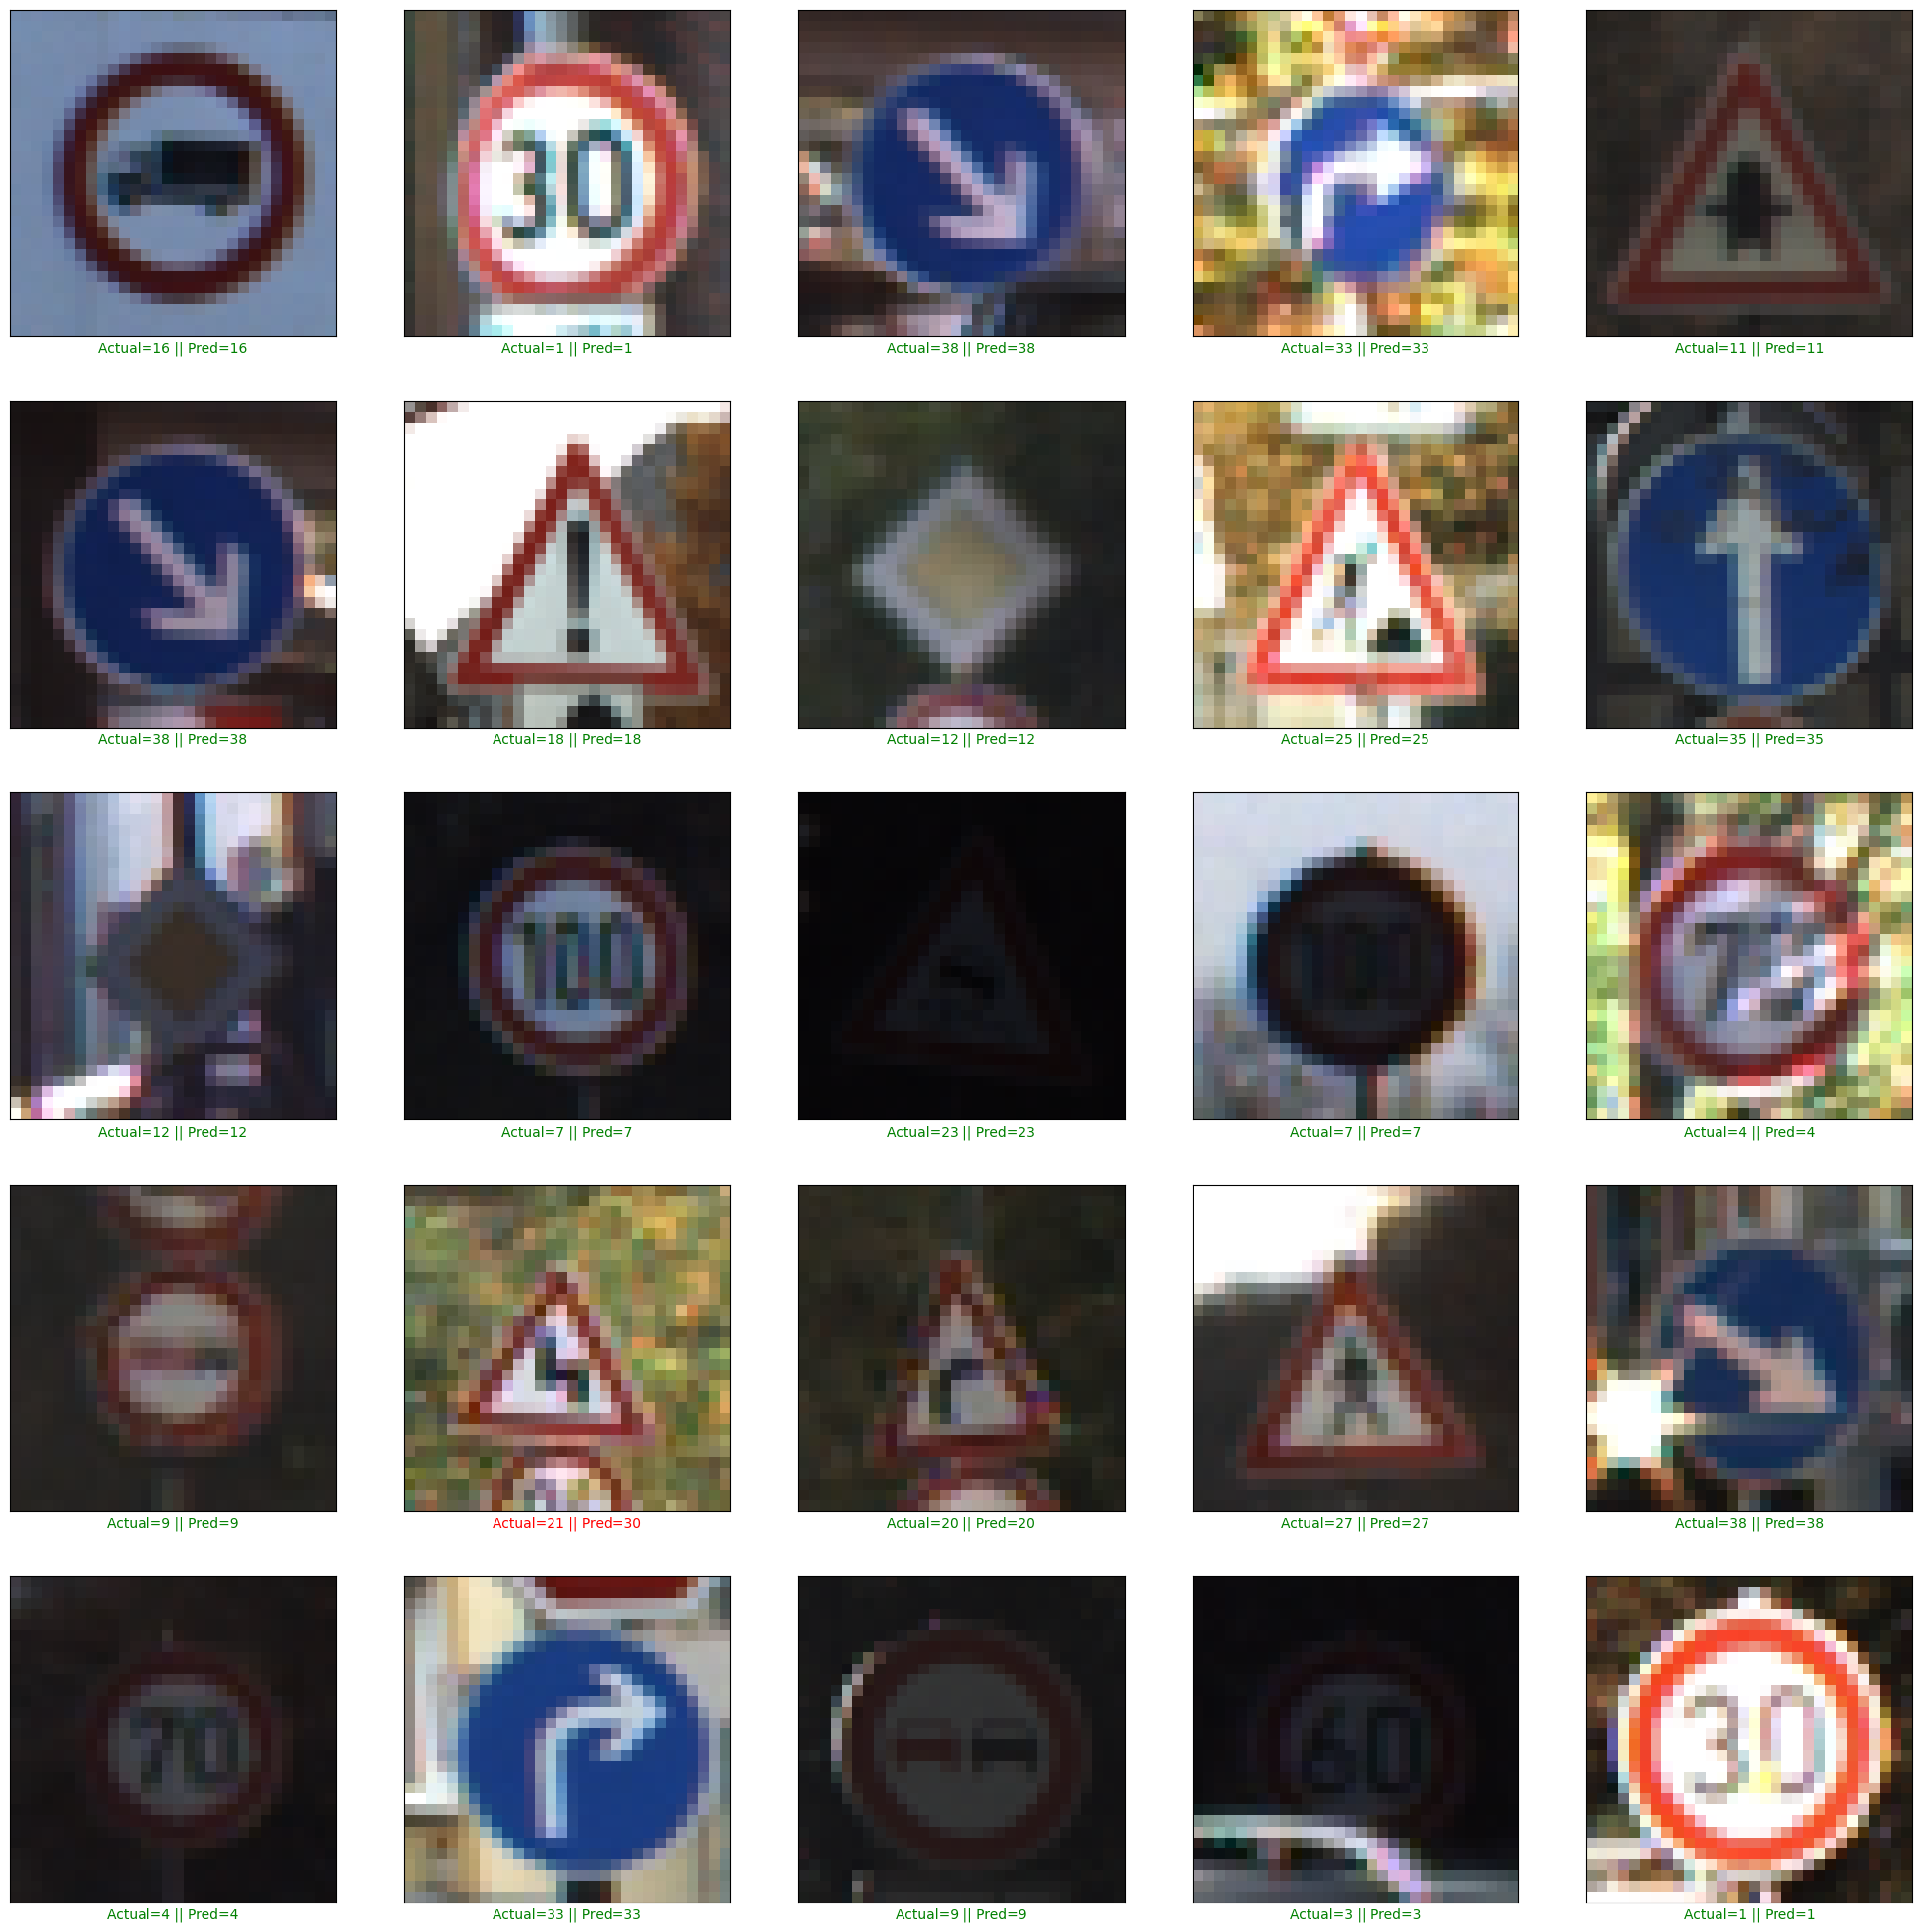

In [17]:
import os
import pandas as pd
import numpy as np
from PIL import Image
import tensorflow as tf
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Définition du chemin d'accès pour le fichier Test.csv
test_csv_path = r'C:\Users\merzo\Desktop\deep learning\archive\Test.csv'

# Importation du dataset de test
y_test = pd.read_csv(test_csv_path)

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data = []

# Récupération des images depuis le répertoire Test
with tf.device('/GPU:0'):
    for img in imgs:
        # Construction correcte du chemin d'accès complet à chaque image
        img_path = os.path.join(r'C:\Users\merzo\Desktop\deep learning\archive', img)
        
        # Ouverture de l'image et redimensionnement
        try:
            image = Image.open(img_path)
            image = image.resize([30, 30])  # Redimensionnement à la taille requise
            data.append(np.array(image))
        except FileNotFoundError:
            print(f"Image not found: {img_path}")  # Afficher les chemins d'images manquants

# Conversion des images en tableau numpy
X_test = np.array(data)

# Prediction sur les données de test
pred = np.argmax(model.predict(X_test), axis=-1)

# Calcul de la précision avec les données de test
print("Accuracy: ", accuracy_score(labels, pred))

# Affichage des prédictions avec Matplotlib
plt.figure(figsize = (25, 25))

start_index = 0
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])  # Pas d'étiquettes sur l'axe x
    plt.yticks([])  # Pas d'étiquettes sur l'axe y
    prediction = pred[start_index + i]
    actual = labels[start_index + i]
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col)
    plt.imshow(X_test[start_index + i])

plt.show()


### Displaying and Evaluating Model Predictions on Test Dataset

In this section, we evaluate the performance of the model on the test dataset by displaying a sample of 50 images along with their true and predicted class labels. The predictions are color-coded to indicate whether they are correct or incorrect. Additionally, the actual and predicted labels are printed for each image.

395/395 [==============================] - 1s 3ms/step


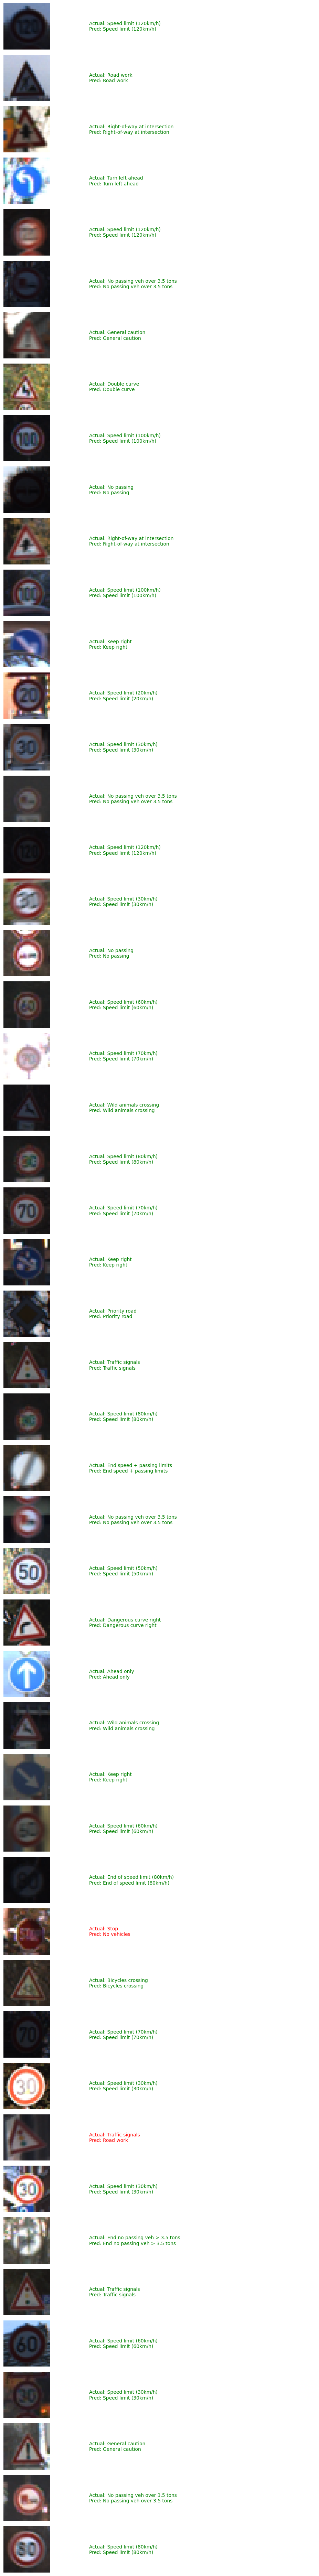

Image 8567: Actual=Speed limit (120km/h) || Pred=Speed limit (120km/h)
Image 4000: Actual=Road work || Pred=Road work
Image 4867: Actual=Right-of-way at intersection || Pred=Right-of-way at intersection
Image 2794: Actual=Turn left ahead || Pred=Turn left ahead
Image 7059: Actual=Speed limit (120km/h) || Pred=Speed limit (120km/h)
Image 9632: Actual=No passing veh over 3.5 tons || Pred=No passing veh over 3.5 tons
Image 4780: Actual=General caution || Pred=General caution
Image 10507: Actual=Double curve || Pred=Double curve
Image 1299: Actual=Speed limit (100km/h) || Pred=Speed limit (100km/h)
Image 11793: Actual=No passing || Pred=No passing
Image 9752: Actual=Right-of-way at intersection || Pred=Right-of-way at intersection
Image 8518: Actual=Speed limit (100km/h) || Pred=Speed limit (100km/h)
Image 11356: Actual=Keep right || Pred=Keep right
Image 4434: Actual=Speed limit (20km/h) || Pred=Speed limit (20km/h)
Image 10409: Actual=Speed limit (30km/h) || Pred=Speed limit (30km/h)
Ima

In [18]:
import os
import pandas as pd
import numpy as np
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt
import random

# Définition du chemin d'accès pour le fichier Test.csv
test_csv_path = r'C:\Users\merzo\Desktop\deep learning\archive\Test.csv'

# Importation du dataset de test
y_test = pd.read_csv(test_csv_path)

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

# Liste des classes
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

data = []

# Récupération des images depuis le répertoire Test
with tf.device('/GPU:0'):
    for img in imgs:
        # Construction correcte du chemin d'accès complet à chaque image
        img_path = os.path.join(r'C:\Users\merzo\Desktop\deep learning\archive', img)
        
        # Ouverture de l'image et redimensionnement
        try:
            image = Image.open(img_path)
            image = image.resize([30, 30])  # Redimensionnement à la taille requise
            data.append(np.array(image))
        except FileNotFoundError:
            print(f"Image not found: {img_path}")  # Afficher les chemins d'images manquants

# Conversion des images en tableau numpy
X_test = np.array(data)

# Prédiction sur les données de test
pred = np.argmax(model.predict(X_test), axis=-1)

# Sélectionner 50 images différentes de manière aléatoire
num_images = 50  # Sélectionner 50 images

# Tirer des indices aléatoires sans répétition
indices = random.sample(range(len(imgs)), num_images)

# Création du tableau pour les affichages
fig, axes = plt.subplots(num_images, 2, figsize=(12, num_images * 1.5))  # 2 colonnes pour image et texte

# Affichage des prédictions avec les noms des classes devant chaque image
for i, idx in enumerate(indices):
    ax_img = axes[i, 0]
    ax_text = axes[i, 1]

    # Affichage de l'image
    ax_img.imshow(X_test[idx])
    ax_img.axis('off')  # Masquer les axes autour de l'image

    # Affichage des prédictions
    prediction = pred[idx]
    actual = labels[idx]
    predicted_class = classes[prediction]  # Nom de la classe prédite
    actual_class = classes[actual]  # Nom de la classe réelle
    col = 'g'
    if prediction != actual:
        col = 'r'

    # Texte à côté de l'image
    ax_text.text(0, 0.5, f'Actual: {actual_class}\nPred: {predicted_class}', fontsize=10, color=col,
                 ha='left', va='center', wrap=True)

    # Masquer les axes pour le texte
    ax_text.axis('off')

plt.tight_layout()  # Ajuster l'espacement entre les sous-graphismes
plt.show()

# Afficher les noms des classes prédite et réelle pour chaque image
for i, idx in enumerate(indices):
    prediction = pred[idx]
    actual = labels[idx]
    predicted_class = classes[prediction]  # Nom de la classe prédite
    actual_class = classes[actual]  # Nom de la classe réelle
    print(f"Image {idx}: Actual={actual_class} || Pred={predicted_class}")


In [19]:
model.save("traffic_sign_model.h5")


### 🚀 Entraînement du Modèle avec Data Augmentation

Dans cette étape, nous avons entraîné un modèle de classification d’images en appliquant une **augmentation de données** pour améliorer sa robustesse et sa capacité de généralisation.

#### ✅ Ce que nous avons fait :

- Utilisation de `ImageDataGenerator` pour générer des images augmentées à partir des données d'entraînement :
  - **Rotation** jusqu'à 10°
  - **Zoom** aléatoire jusqu'à 10%
  - **Décalage** horizontal/vertical de 5%
  - Mode de remplissage : `'nearest'`

- Construction d’un modèle CNN plus robuste avec :
  - **Batch Normalization** après chaque couche de convolution pour stabiliser l'apprentissage
  - **Dropout** pour réduire le surapprentissage
  - **Dense layer** finale avec 43 neurones (nombre de classes)

- Prétraitement des données :
  - Normalisation des images (valeurs entre 0 et 1)
  - Encodage des labels avec `to_categorical` pour la classification multi-classes

- Ajout de 3 **callbacks** intelligents :
  - `ModelCheckpoint` : sauvegarde automatique du meilleur modèle
  - `EarlyStopping` : arrêt anticipé en cas de stagnation
  - `ReduceLROnPlateau` : réduction automatique du taux d'apprentissage

- L'entraînement a duré **26 époques** mais a été **interrompu automatiquement** à cause du `early stopping`.  
  Le **meilleur modèle** a été obtenu à l’**epoch 20**, avec :
  - **Validation Accuracy** : 98.50%
  - **Validation Loss** : 0.0630

🎯 Cette stratégie a permis d’entraîner un modèle performant tout en évitant le surapprentissage.


In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt


In [21]:
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.05,
    height_shift_range=0.05,
    fill_mode='nearest'
)

datagen.fit(X_train)


In [22]:
model_aug = Sequential()

model_aug.add(Conv2D(32, (5,5), activation='relu', input_shape=X_train.shape[1:]))
model_aug.add(BatchNormalization())
model_aug.add(Conv2D(64, (5,5), activation='relu'))
model_aug.add(BatchNormalization())
model_aug.add(MaxPool2D(pool_size=(2, 2)))
model_aug.add(Dropout(0.15))

model_aug.add(Conv2D(128, (3, 3), activation='relu'))
model_aug.add(BatchNormalization())
model_aug.add(Conv2D(256, (3, 3), activation='relu'))
model_aug.add(BatchNormalization())
model_aug.add(MaxPool2D(pool_size=(2, 2)))
model_aug.add(Dropout(0.20))

model_aug.add(Flatten())
model_aug.add(Dense(512, activation='relu'))
model_aug.add(Dropout(0.25))
model_aug.add(Dense(43, activation='softmax'))



In [23]:
model_aug.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.0005),
    metrics=['accuracy']
)


In [24]:
checkpoint = ModelCheckpoint('model_aug_best.h5', save_best_only=True, monitor='val_accuracy', mode='max', verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1, min_lr=1e-6)


In [25]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0


In [26]:
# ✔️ Réimportation des labels valides
df_test = pd.read_csv('C:/Users/merzo/Desktop/deep learning/archive/Test.csv')
y_test = df_test['ClassId'].values
y_test = to_categorical(y_test, num_classes=43)


In [27]:
from tensorflow.keras.utils import to_categorical

y_train = np.array(y_train)
y_test = np.array(y_test)

if y_train.ndim == 1 or y_train.shape[1] != 43:
    y_train = to_categorical(y_train, num_classes=43)

if y_test.ndim == 1 or y_test.shape[1] != 43:
    y_test = to_categorical(y_test, num_classes=43)


In [28]:
print(f"✅ X_train dtype: {X_train.dtype}")   # doit être float32
print(f"✅ y_train dtype: {y_train.dtype}")   # doit être float32 ou float64
print(f"✅ y_train shape: {y_train.shape}")   # doit être (nb_samples, 43)


✅ X_train dtype: float32
✅ y_train dtype: float32
✅ y_train shape: (31367, 43)


In [29]:
with tf.device('/GPU:0'):
    history_aug = model_aug.fit(
        datagen.flow(X_train, y_train, batch_size=128),
        steps_per_epoch=X_train.shape[0] // 128,
        epochs=35,
        validation_data=(X_test, y_test),
        callbacks=[checkpoint, early_stopping, reduce_lr]
    )


Epoch 1/35
245/245 [==============================] - ETA: 0s - loss: 0.9322 - accuracy: 0.7441      
Epoch 1: val_accuracy improved from -inf to 0.30499, saving model to model_aug_best.h5
245/245 [==============================] - 18s 68ms/step - loss: 0.9322 - accuracy: 0.7441 - val_loss: 3.0478 - val_accuracy: 0.3050 - lr: 5.0000e-04
Epoch 2/35
245/245 [==============================] - ETA: 0s - loss: 0.1623 - accuracy: 0.9486 
Epoch 2: val_accuracy improved from 0.30499 to 0.88955, saving model to model_aug_best.h5
245/245 [==============================] - 18s 71ms/step - loss: 0.1623 - accuracy: 0.9486 - val_loss: 0.3604 - val_accuracy: 0.8895 - lr: 5.0000e-04
Epoch 3/35
245/245 [==============================] - ETA: 0s - loss: 0.0911 - accuracy: 0.9720 
Epoch 3: val_accuracy improved from 0.88955 to 0.97213, saving model to model_aug_best.h5
245/245 [==============================] - 17s 69ms/step - loss: 0.0911 - accuracy: 0.9720 - val_loss: 0.0973 - val_accuracy: 0.9721 - lr

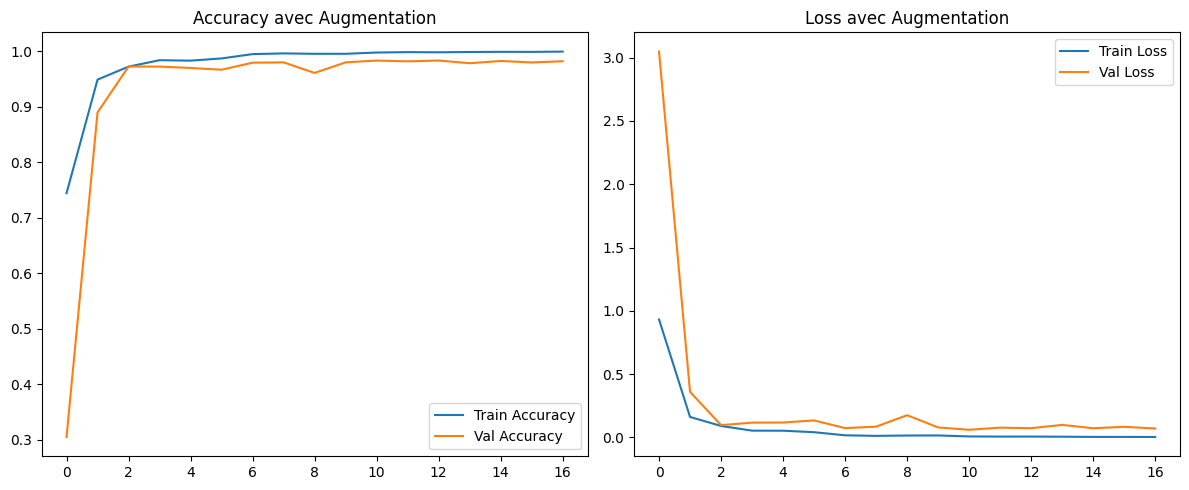

In [30]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_aug.history['accuracy'], label='Train Accuracy')
plt.plot(history_aug.history['val_accuracy'], label='Val Accuracy')
plt.title("Accuracy avec Augmentation")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_aug.history['loss'], label='Train Loss')
plt.plot(history_aug.history['val_loss'], label='Val Loss')
plt.title("Loss avec Augmentation")
plt.legend()

plt.tight_layout()
plt.show()


In [31]:
from tensorflow.keras.models import load_model

best_model = load_model('model_aug_best.h5')
loss, acc = best_model.evaluate(X_test, y_test)
print(f"✅ Accuracy finale du modèle sauvegardé : {acc:.4f}")


395/395 [==============================] - 2s 4ms/step - loss: 0.0735 - accuracy: 0.9830  
✅ Accuracy finale du modèle sauvegardé : 0.9830


1/1 [==============================] - 0s 220ms/step


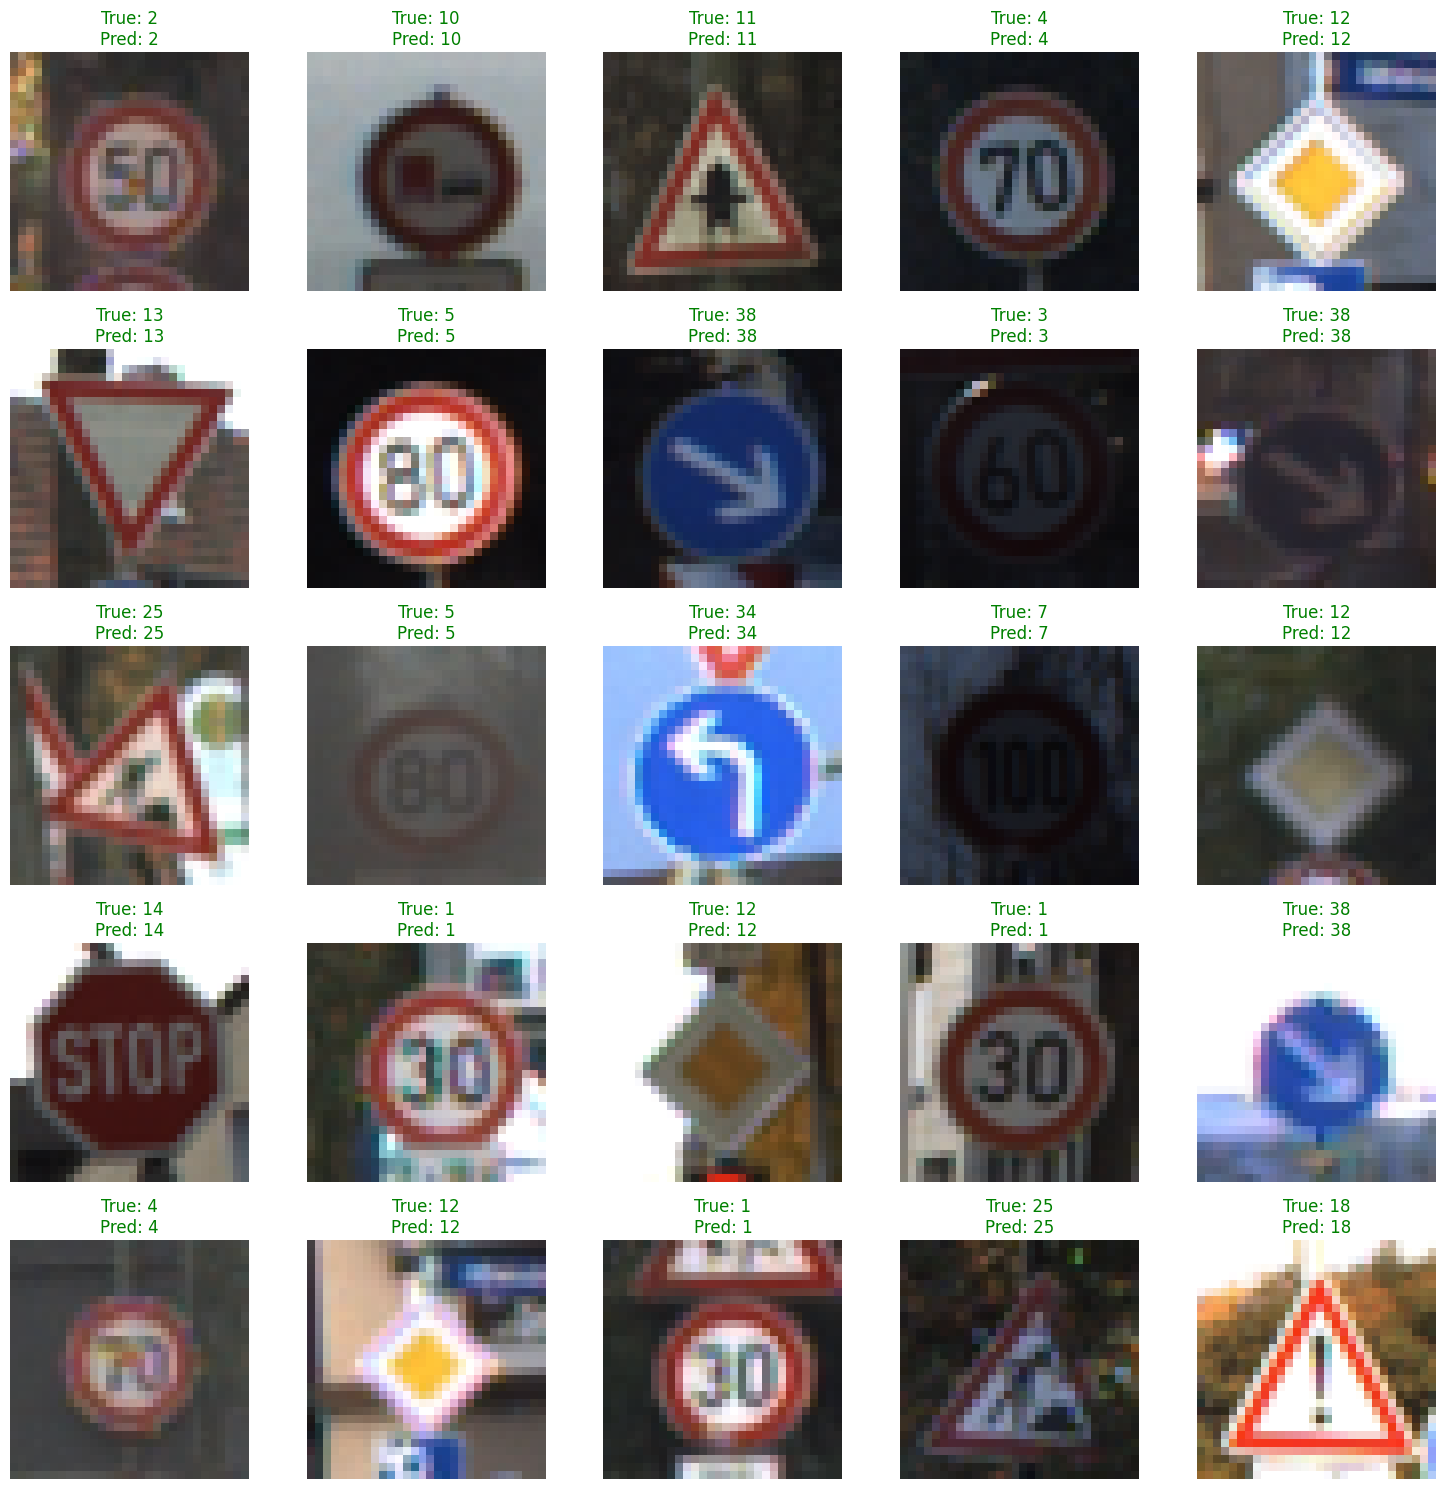

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Liste des noms de classes (si tu veux afficher les noms au lieu des indices)
classes = {
    0: 'Speed limit (20km/h)', 1: 'Speed limit (30km/h)', 2: 'Speed limit (50km/h)', 3: 'Speed limit (60km/h)',
    4: 'Speed limit (70km/h)', 5: 'Speed limit (80km/h)', 6: 'End of speed limit (80km/h)', 7: 'Speed limit (100km/h)',
    8: 'Speed limit (120km/h)', 9: 'No passing', 10: 'No passing > 3.5 tons', 11: 'Right-of-way at intersection',
    12: 'Priority road', 13: 'Yield', 14: 'Stop', 15: 'No vehicles', 16: '> 3.5 tons prohibited', 17: 'No entry',
    18: 'Caution', 19: 'Dangerous curve left', 20: 'Dangerous curve right', 21: 'Double curve', 22: 'Bumpy road',
    23: 'Slippery road', 24: 'Road narrows right', 25: 'Road work', 26: 'Traffic signals', 27: 'Pedestrians',
    28: 'Children crossing', 29: 'Bicycles crossing', 30: 'Ice/snow', 31: 'Wild animals crossing',
    32: 'End speed+passing limits', 33: 'Turn right', 34: 'Turn left', 35: 'Ahead only',
    36: 'Go straight or right', 37: 'Go straight or left', 38: 'Keep right', 39: 'Keep left',
    40: 'Roundabout mandatory', 41: 'End of no passing', 42: 'End no passing > 3.5 tons'
}

# Sélection de 25 images aléatoires de test
np.random.seed(42)
indices = np.random.choice(len(X_test), 25, replace=False)
images = X_test[indices]
true_labels = np.argmax(y_test[indices], axis=1)

# Prédictions
pred_probs = best_model.predict(images)
pred_labels = np.argmax(pred_probs, axis=1)

# Affichage
plt.figure(figsize=(15, 15))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(images[i])
    plt.axis('off')
    
    true = true_labels[i]
    pred = pred_labels[i]
    
    color = 'green' if pred == true else 'red'
    
    plt.title(f"True: {true}\nPred: {pred}", color=color)
    # Pour voir les noms :
    # plt.title(f"V: {classes[true]}\nP: {classes[pred]}", color=color, fontsize=8)

plt.tight_layout()
plt.show()


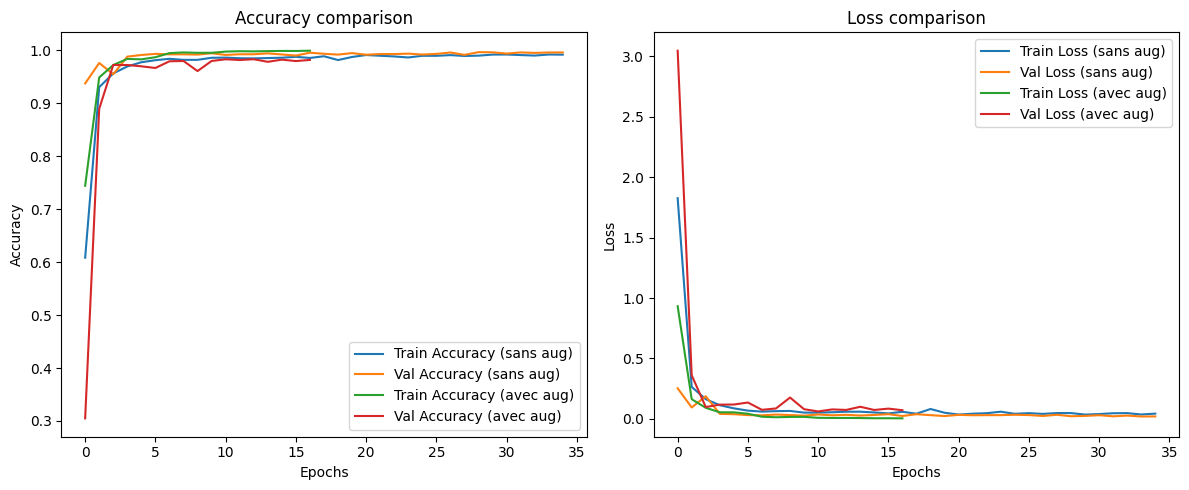

In [33]:
import matplotlib.pyplot as plt

# Affichage des courbes d'accuracy
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'], label='Train Accuracy (sans aug)')
plt.plot(history1.history['val_accuracy'], label='Val Accuracy (sans aug)')
plt.plot(history_aug.history['accuracy'], label='Train Accuracy (avec aug)')
plt.plot(history_aug.history['val_accuracy'], label='Val Accuracy (avec aug)')
plt.title('Accuracy comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'], label='Train Loss (sans aug)')
plt.plot(history1.history['val_loss'], label='Val Loss (sans aug)')
plt.plot(history_aug.history['loss'], label='Train Loss (avec aug)')
plt.plot(history_aug.history['val_loss'], label='Val Loss (avec aug)')
plt.title('Loss comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


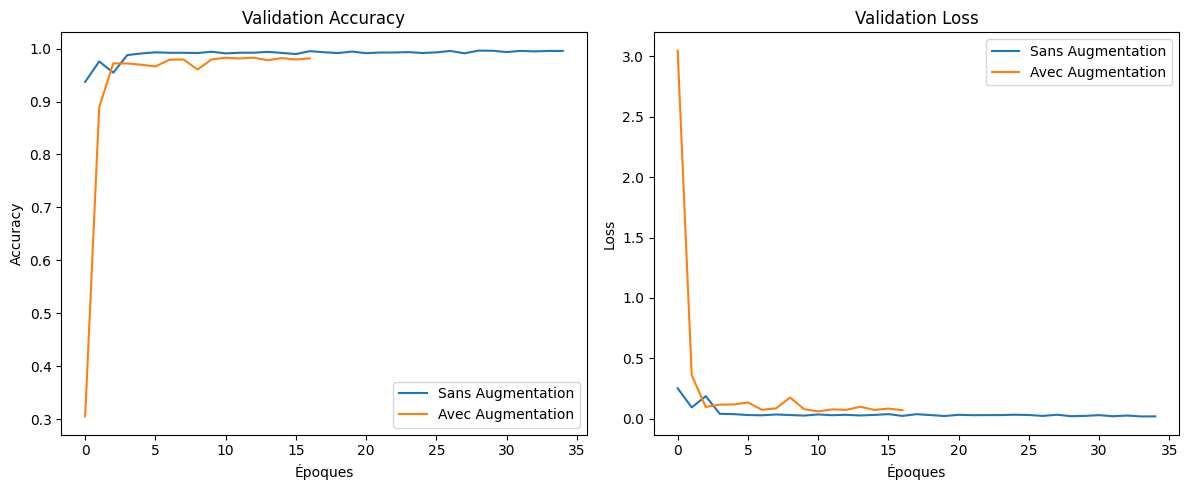

In [34]:
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history1.history['val_accuracy'], label='Sans Augmentation')
plt.plot(history_aug.history['val_accuracy'], label='Avec Augmentation')
plt.title("Validation Accuracy")
plt.xlabel("Époques")
plt.ylabel("Accuracy")
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history1.history['val_loss'], label='Sans Augmentation')
plt.plot(history_aug.history['val_loss'], label='Avec Augmentation')
plt.title("Validation Loss")
plt.xlabel("Époques")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()


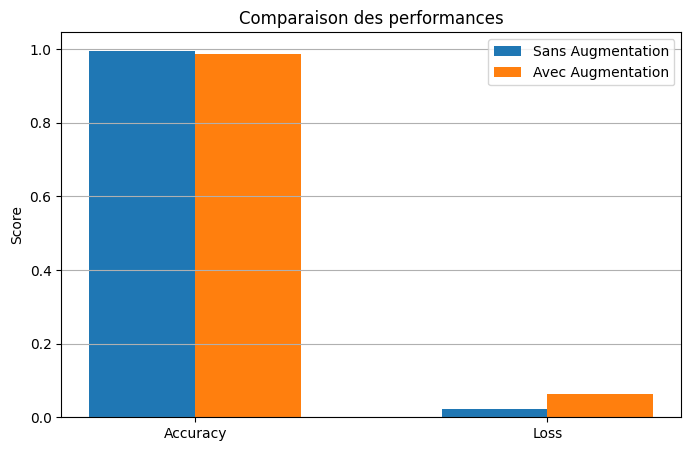

In [35]:
import matplotlib.pyplot as plt

labels = ['Accuracy', 'Loss']
model_sans = [0.9955, 0.0218]
model_aug = [0.9850, 0.0630]

x = range(len(labels))

plt.figure(figsize=(8, 5))
plt.bar(x, model_sans, width=0.3, label='Sans Augmentation', align='center')
plt.bar([i + 0.3 for i in x], model_aug, width=0.3, label='Avec Augmentation', align='center')

plt.xticks([i + 0.15 for i in x], labels)
plt.ylabel('Score')
plt.title('Comparaison des performances')
plt.legend()
plt.grid(axis='y')
plt.show()


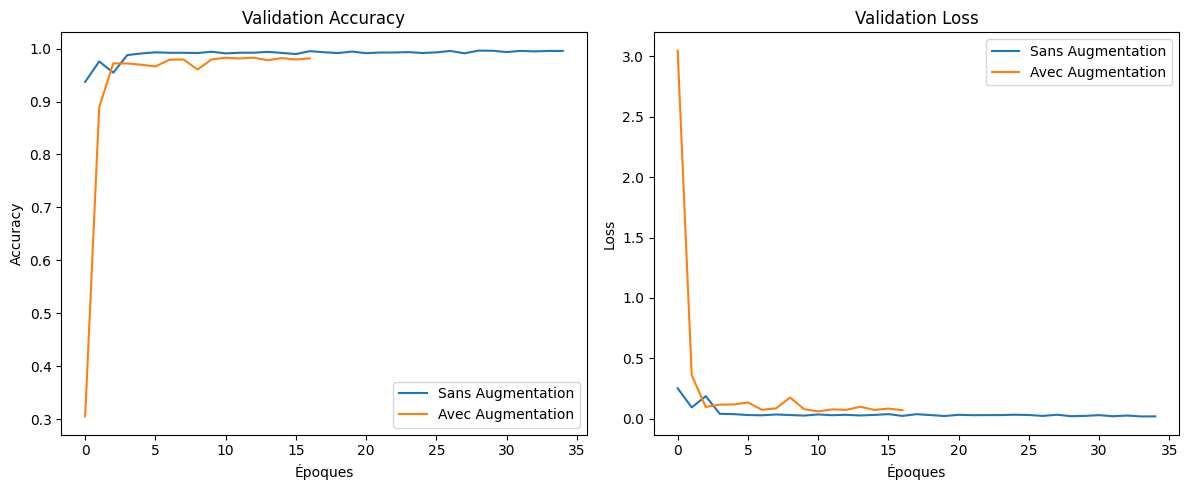

In [36]:
# Comparaison Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history1.history['val_accuracy'], label='Sans Augmentation')
plt.plot(history_aug.history['val_accuracy'], label='Avec Augmentation')
plt.title('Validation Accuracy')
plt.xlabel('Époques')
plt.ylabel('Accuracy')
plt.legend()

# Comparaison Loss
plt.subplot(1, 2, 2)
plt.plot(history1.history['val_loss'], label='Sans Augmentation')
plt.plot(history_aug.history['val_loss'], label='Avec Augmentation')
plt.title('Validation Loss')
plt.xlabel('Époques')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


### 📊 Comparaison des Modèles - Sans vs Avec Augmentation

| Critère                     | Modèle Sans Augmentation     | Modèle Avec Augmentation     |
|----------------------------|------------------------------|------------------------------|
| **Validation Accuracy**    | ✅ 99.55%                     | ✅ 98.50%                     |
| **Validation Loss**        | 🔻 0.0218                     | 🔻 0.0630                     |
| **Nombre d’époques**       | 35                           | 26 (early stopping)          |
| **Callbacks utilisés**     | Non                          | Oui (checkpoint, early stop) |
| **Data Augmentation**      | ❌ Non                       | ✅ Oui (rotation, zoom...)    |
| **Robustesse**             | Moyenne                      | Élevée (meilleure généralisation) |


In [37]:
import tensorflow as tf
print("✅ GPU détecté :", tf.config.list_physical_devices('GPU'))


✅ GPU détecté : [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [38]:
import numpy as np
import tensorflow as tf
import cv2

img_height, img_width = 128, 128

X_train_clean, y_train_clean = [], []
for i in range(len(X_train)):
    try:
        img = cv2.resize(X_train[i], (img_width, img_height)).astype(np.float32) / 255.0
        if img.shape == (128, 128, 3) and not np.isnan(img).any() and not np.isinf(img).any():
            label = y_train[i]
            if isinstance(label, (np.ndarray, list)) and len(label) == 43:
                label = label
            else:
                label = tf.one_hot(label, depth=43).numpy()  # ⬅️ convert to numpy, not Tensor

            X_train_clean.append(img)
            y_train_clean.append(label)
    except Exception as e:
        print(f"❌ Erreur train image {i} :", e)

X_test_clean, y_test_clean = [], []
for i in range(len(X_test)):
    try:
        img = cv2.resize(X_test[i], (img_width, img_height)).astype(np.float32) / 255.0
        if img.shape == (128, 128, 3) and not np.isnan(img).any() and not np.isinf(img).any():
            label = y_test[i]
            if isinstance(label, (np.ndarray, list)) and len(label) == 43:
                label = label
            else:
                label = tf.one_hot(label, depth=43).numpy()

            X_test_clean.append(img)
            y_test_clean.append(label)
    except Exception as e:
        print(f"❌ Erreur test image {i} :", e)

# ➕ Convertir à la fin
X_train_clean = np.array(X_train_clean, dtype=np.float32)
y_train_clean = np.array(y_train_clean, dtype=np.float32)
X_test_clean = np.array(X_test_clean, dtype=np.float32)
y_test_clean = np.array(y_test_clean, dtype=np.float32)


In [39]:
def generator(data, labels):
    for x, y in zip(data, labels):
        yield x, y


In [40]:
train_ds = tf.data.Dataset.from_generator(
    lambda: generator(X_train_clean, y_train_clean),
    output_signature=(
        tf.TensorSpec(shape=(128, 128, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(43,), dtype=tf.float32)
    )
)

val_ds = tf.data.Dataset.from_generator(
    lambda: generator(X_test_clean, y_test_clean),
    output_signature=(
        tf.TensorSpec(shape=(128, 128, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(43,), dtype=tf.float32)
    )
)


In [41]:
batch_size = 64

train_ds = train_ds.shuffle(1000).batch(batch_size).prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.batch(batch_size).prefetch(tf.data.AUTOTUNE)


In [42]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

callbacks = [
    ModelCheckpoint("mobilenet_best.h5", save_best_only=True, monitor="val_accuracy", mode="max", verbose=1),
    EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True, verbose=1),
    ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, verbose=1)
]


In [43]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.optimizers import Adam

base_model = MobileNetV2(input_shape=(128, 128, 3), include_top=False, weights='imagenet')
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(43, activation='softmax')(x)

model_tl = Model(inputs=base_model.input, outputs=output)

model_tl.compile(optimizer=Adam(learning_rate=0.0001),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])


In [44]:
history = model_tl.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30,
    callbacks=callbacks
)


Epoch 1/30
    491/Unknown - 26s 46ms/step - loss: 3.6778 - accuracy: 0.0493
Epoch 1: val_accuracy improved from -inf to 0.05701, saving model to mobilenet_best.h5
491/491 [==============================] - 38s 71ms/step - loss: 3.6778 - accuracy: 0.0493 - val_loss: 3.5059 - val_accuracy: 0.0570 - lr: 1.0000e-04
Epoch 2/30
491/491 [==============================] - ETA: 0s - loss: 3.5866 - accuracy: 0.0495  
Epoch 2: val_accuracy did not improve from 0.05701
491/491 [==============================] - 31s 63ms/step - loss: 3.5866 - accuracy: 0.0495 - val_loss: 3.4905 - val_accuracy: 0.0570 - lr: 1.0000e-04
Epoch 3/30
491/491 [==============================] - ETA: 0s - loss: 3.5615 - accuracy: 0.0508  
Epoch 3: val_accuracy improved from 0.05701 to 0.05938, saving model to mobilenet_best.h5
491/491 [==============================] - 33s 68ms/step - loss: 3.5615 - accuracy: 0.0508 - val_loss: 3.4797 - val_accuracy: 0.0594 - lr: 1.0000e-04
Epoch 4/30
491/491 [=============================

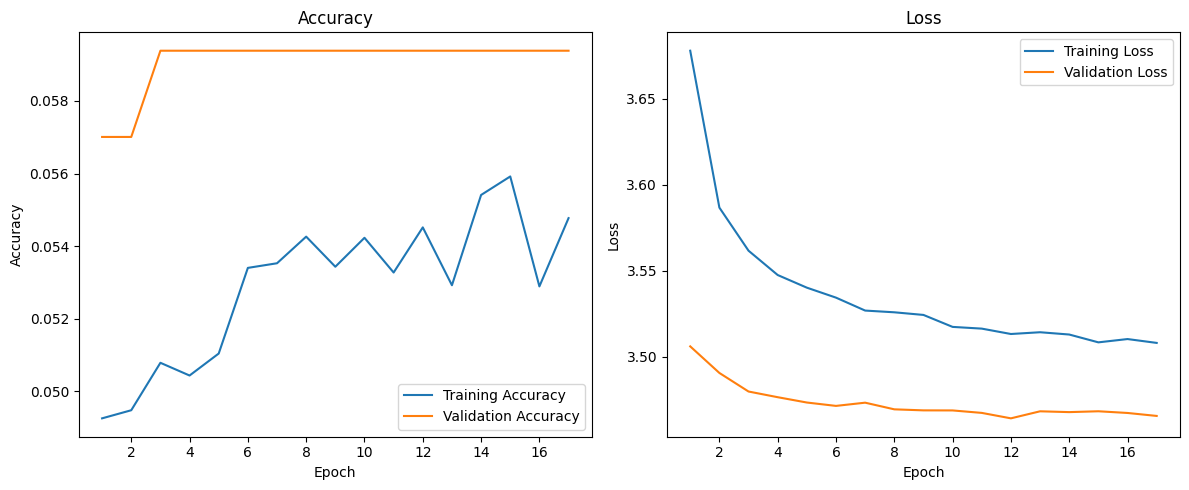

In [45]:
import matplotlib.pyplot as plt

# Récupérer les données de l'entraînement
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(acc) + 1)

# Affichage Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Affichage Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [46]:
print(f"✅ Accuracy finale entraînement : {acc[-1]:.4f}")
print(f"✅ Accuracy finale validation   : {val_acc[-1]:.4f}")


✅ Accuracy finale entraînement : 0.0548
✅ Accuracy finale validation   : 0.0594


In [47]:
from tensorflow.keras.models import load_model

best_tl = load_model("mobilenet_best.h5")
loss, acc = best_tl.evaluate(val_ds)
print(f"✅ Accuracy finale (MobileNetV2) : {acc:.4f}")


198/198 [==============================] - 10s 45ms/step - loss: 3.4797 - accuracy: 0.0594
✅ Accuracy finale (MobileNetV2) : 0.0594


In [48]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# 1. Dataset generator (assuré que tu as déjà X_train_clean, y_train_clean...)
def generator(X, y):
    for i in range(len(X)):
        yield X[i], y[i]

# 2. Création du dataset avec tf.data (pour ne pas saturer la mémoire GPU)
batch_size = 64

train_ds = tf.data.Dataset.from_generator(
    lambda: generator(X_train_clean, y_train_clean),
    output_signature=(
        tf.TensorSpec(shape=(128, 128, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(43,), dtype=tf.float32)
    )
).shuffle(1000).batch(batch_size).prefetch(tf.data.AUTOTUNE)

val_ds = tf.data.Dataset.from_generator(
    lambda: generator(X_test_clean, y_test_clean),
    output_signature=(
        tf.TensorSpec(shape=(128, 128, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(43,), dtype=tf.float32)
    )
).batch(batch_size).prefetch(tf.data.AUTOTUNE)

# 3. Callbacks
callbacks = [
    ModelCheckpoint("mobilenet_best.h5", save_best_only=True, monitor="val_accuracy", mode="max", verbose=1),
    EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True, verbose=1),
    ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, verbose=1)
]

# 4. Création du modèle base MobileNetV2 (feature extraction)
base_model = MobileNetV2(input_shape=(128, 128, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # On fige toutes les couches

# 5. Ajout des couches de sortie personnalisées
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(43, activation='softmax')(x)

model_tl = Model(inputs=base_model.input, outputs=output)

# 6. Compilation initiale (pour l'étape de feature extraction)
model_tl.compile(optimizer=Adam(learning_rate=1e-4),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

# 7. Entraînement de base
history_base = model_tl.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
    callbacks=callbacks
)

# 8. Dégeler une partie des couches (Fine-tuning)
base_model.trainable = True
fine_tune_at = 100
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

# 9. Recompiler avec un learning rate plus petit
model_tl.compile(optimizer=Adam(learning_rate=1e-5),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

# 10. Réentraîner (fine-tuning)
history_finetune = model_tl.fit(
    train_ds,
    validation_data=val_ds,
    epochs=15,
    callbacks=callbacks
)

# 11. Évaluer le modèle final
from tensorflow.keras.models import load_model
best_model = load_model('mobilenet_best.h5')
loss, acc = best_model.evaluate(val_ds)
print(f"✅ Accuracy finale après fine-tuning : {acc:.4f}")


Epoch 1/10
    490/Unknown - 25s 45ms/step - loss: 3.6868 - accuracy: 0.0480 
Epoch 1: val_accuracy improved from -inf to 0.05701, saving model to mobilenet_best.h5
491/491 [==============================] - 34s 65ms/step - loss: 3.6869 - accuracy: 0.0480 - val_loss: 3.5182 - val_accuracy: 0.0570 - lr: 1.0000e-04
Epoch 2/10
490/491 [============================>.] - ETA: 0s - loss: 3.5865 - accuracy: 0.0514  
Epoch 2: val_accuracy did not improve from 0.05701
491/491 [==============================] - 31s 63ms/step - loss: 3.5865 - accuracy: 0.0514 - val_loss: 3.5005 - val_accuracy: 0.0570 - lr: 1.0000e-04
Epoch 3/10
490/491 [============================>.] - ETA: 0s - loss: 3.5640 - accuracy: 0.0517  
Epoch 3: val_accuracy did not improve from 0.05701
491/491 [==============================] - 32s 65ms/step - loss: 3.5640 - accuracy: 0.0517 - val_loss: 3.4918 - val_accuracy: 0.0570 - lr: 1.0000e-04
Epoch 4/10
490/491 [============================>.] - ETA: 0s - loss: 3.5499 - accuracy